### DSCI 510 Fall 2020 Final Project Submission

1.**The name of student**:

    Ruichao Ma (only one)

2.**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**:

    The imdb dataset takes more than 5 minutes to scrape datasets from websites.
    And I think some features are not necessary part for analysis. Such as movie plot, star names, I do not use them in
    analysis. Next time to do similar projects I will put higher weights on features that useful in analysis. 

3.**Any libraries that need to be installed to run your code (see above)**

    Package for data analysis:
        import pandas as pd
        import seaborn as sns
        import matplotlib.pyplot as plt
        import numpy as np
        from scipy import stats
        from mpl_toolkits import mplot3d

    Package for data scraping:
        import requests
        import re
        from bs4 import BeautifulSoup
        import pandas as pd
        import numpy as np
        from sklearn.impute import SimpleImputer
        import warnings
        warnings.filterwarnings('ignore')
        from IPython import get_ipython
        import os
        from imdb import IMDb
        from omdbapi.movie_search import GetMovie
        os.system('pip install omdb')
        os.system('pip install omdbapi')
        os.system('pip install IMDbPY')


4.**Anything else you feel is relevant to the grading of your project**

    My goal in my project is not structured very well. I want to explore correlationship between imdb rating scores in movies with lots of potential relevent features: budget, profits earned, number of audience, length of movie, oscar awards and nominations gain. Figured out their correlation patterns. However, I think these features may be a little bit overwhelming, so that may lead my structures in project be a little bit messy.

5.**What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    I want to explore correlationship between imdb rating scores in movies with lots of potential relevent features: budget, profits earned, number of audience, length of movie, oscar awards and nominations gain. Figured out common features in high rated movies. In this way, it is probable useful to predict whether movies gain high rated scores in IMDB by utilizing these common feature. Moreover, I want to know whether imdb rating, metascore and rotten tomatoes scoring system are dependent on each other.

6.**What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    Most of features(movie length, budget, profits earned, oscar awards and nominations) have positive but weak correlationship with imdb rating score. It is a little bit unexpected. Originally I think more features will have strong positivecorrelation with imdb rating scores, like profits earned, oscar awards and nominations gained. The truth is that correlation indeed is positive, but less stronger than I originally thought. The strongest correlation I found is that between number of people who rate this movie and imdb rating score. It seems like high rated movies will likely have more people to rate this, or vice versa. Moreover, it seems like imdb, metascore, rotten tomatoes scores are three independent scoreing systems since their mutual correlation approach to zero.

7.**What difficulties did you have in completing the project?**

    For me, the difficult part is web scrapping data process. Since some features information are not very structured in html code, even some data are missing, So I spend lots of work to scrape them and store them in organized and structured ways, and fill missing data with overall median values. 

8.**What skills did you wish you had while you were doing the project?**

    1. how to use data visualization tools in actual context
    2. how to web scrape data in python
    3. how to use pandas dataframe to pre-process cleaning and merge data

9.**What would you do “next” to expand or augment the project?**

    First, I will include less features that irrelevent in analysis. Also, I will use more advanced data scientist's skills to analyze data. Like use machine learning to predict future imdb rating patterns based on relevent features, use support vector machine and decision tree to classify movies by their genres, oscar awards gain and make it viusalized more clearly.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
##loading dataset
imdb_info = pd.read_csv('data/imdb_top_250_movies.csv')
omdb_info = pd.read_csv('data/omdb_api.csv')
oscar_info = pd.read_csv('data/oscar_awarded_movie.csv')

In [3]:
##using ranking among 250 as index
imdb_info=imdb_info.set_index(['ranking among 250'], drop=True)
##change column name to 'title' so it is convenient for merge other dataset
imdb_info.rename(columns = {'movie name':'Title'}, inplace = True) 
##show what dataset looks like
imdb_info.head(5)

,Title,url link,IMDB rating score,highest rating score,number of rating,number of audience(thousands),movie type,movie length,movie genre,movie released date,stars,gross worldwide profit,number of production company,Budget(thousands in unit),profits in USA,movie description
ranking among 250,,,,,,,,,,,,,,,,
1,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,9.3,10,2311509,84,R,2h 22min,Drama,14 October 1994 (USA),"Tim Robbins,Morgan Freeman,Tim Robbins,Morgan ...",2.881529e+07,28,25000.0,28699976.0,Two imprisoned men bond over a number of years...
2,The Godfather,https://www.imdb.com/title/tt0068646/,9.2,10,1595586,40,R,2h 55min,"Crime,Drama",24 March 1972 (USA),"Marlon Brando,Al Pacino,Marlon Brando,Al Pacin...",2.461210e+08,42,6000.0,134966411.0,The aging patriarch of an organized crime dyna...
3,The Godfather: Part II,https://www.imdb.com/title/tt0071562/,9.0,10,1114697,10,R,3h 22min,"Crime,Drama",18 December 1974 (USA),"Al Pacino,Robert De Niro,Al Pacino,Robert De N...",4.803578e+07,63,13000.0,47834595.0,The early life and career of Vito Corleone in ...
4,The Dark Knight,https://www.imdb.com/title/tt0468569/,9.0,10,2274212,70,PG-13,2h 32min,"Action,Crime,Drama",18 July 2008 (USA),"Christian Bale,Heath Ledger,Christian Bale,Hea...",1.005457e+09,51,18500.0,535234033.0,When the menace known as the Joker wreaks havo...
5,12 Angry Men,https://www.imdb.com/title/tt0050083/,9.0,10,679807,16,Approved,1h 36min,"Crime,Drama",10 April 1957 (USA),"Henry Fonda,Lee J. Cobb,Henry Fonda,Lee J. Cob...",5.760000e+02,25,35000.0,33812900.0,A jury holdout attempts to prevent a miscarria...


In [4]:
##using ranking among 250 as index
omdb_info=omdb_info.set_index(['Ranking among 250'], drop=True)
omdb_info.head(5)

,Title,Metascore,Rotten Tomatoes Score,Year,Country,Runtime(min),Language,Director,Writer,Production Company,Type,Plot
Ranking among 250,,,,,,,,,,,,
1,The Shawshank Redemption,80.0,91.0,1994,USA,142,English,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Columbia Pictures, Castle Rock Entertainment",movie,Chronicles the experiences of a formerly succe...
2,The Godfather,100.0,98.0,1972,USA,175,"English, Italian, Latin",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...",Paramount Pictures,movie,When the aging head of a famous crime family d...
3,The Godfather: Part II,90.0,98.0,1974,USA,202,"English, Italian, Spanish, Latin, Sicilian",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Paramount Pictures, Coppola Company",movie,The continuing saga of the Corleone crime fami...
4,The Dark Knight,84.0,94.0,2008,"USA, UK",152,"English, Mandarin",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...",Syncopy,movie,Set within a year after the events of Batman B...
5,12 Angry Men,96.0,10.0,1957,USA,96,English,Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)",Orion-Nova Pictures,movie,The defense and the prosecution have rested an...


In [5]:
##merge imdb_top_250_movies dataset with omdb_api
imdb_omdb_merged = pd.merge(left=imdb_info, right=omdb_info, how='left',on='Title')
imdb_omdb_merged.head(5)

,Title,url link,IMDB rating score,highest rating score,number of rating,number of audience(thousands),movie type,movie length,movie genre,movie released date,...,Rotten Tomatoes Score,Year,Country,Runtime(min),Language,Director,Writer,Production Company,Type,Plot
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,9.3,10,2311509,84,R,2h 22min,Drama,14 October 1994 (USA),...,91.0,1994.0,USA,142.0,English,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Columbia Pictures, Castle Rock Entertainment",movie,Chronicles the experiences of a formerly succe...
1,The Godfather,https://www.imdb.com/title/tt0068646/,9.2,10,1595586,40,R,2h 55min,"Crime,Drama",24 March 1972 (USA),...,98.0,1972.0,USA,175.0,"English, Italian, Latin",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...",Paramount Pictures,movie,When the aging head of a famous crime family d...
2,The Godfather: Part II,https://www.imdb.com/title/tt0071562/,9.0,10,1114697,10,R,3h 22min,"Crime,Drama",18 December 1974 (USA),...,98.0,1974.0,USA,202.0,"English, Italian, Spanish, Latin, Sicilian",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Paramount Pictures, Coppola Company",movie,The continuing saga of the Corleone crime fami...
3,The Dark Knight,https://www.imdb.com/title/tt0468569/,9.0,10,2274212,70,PG-13,2h 32min,"Action,Crime,Drama",18 July 2008 (USA),...,94.0,2008.0,"USA, UK",152.0,"English, Mandarin",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...",Syncopy,movie,Set within a year after the events of Batman B...
4,12 Angry Men,https://www.imdb.com/title/tt0050083/,9.0,10,679807,16,Approved,1h 36min,"Crime,Drama",10 April 1957 (USA),...,10.0,1957.0,USA,96.0,English,Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)",Orion-Nova Pictures,movie,The defense and the prosecution have rested an...


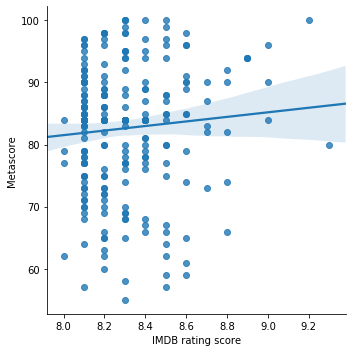

In [6]:
##showing correlation plot between IMDB rating score and Metascore,to figure out whether two scoring systems are independent
##with each other
sns.lmplot(x='IMDB rating score', y='Metascore', data=imdb_omdb_merged, fit_reg=True)

In [7]:
##calculating correlation coefficient
corr_imdb_meta = imdb_omdb_merged['IMDB rating score'].corr(imdb_omdb_merged['Metascore'])
print('The coefficient correlation between IMDB rating score and Rotten Tomatoes Score is',corr_imdb_meta)

The coefficient correlation between IMDB rating score and Rotten Tomatoes Score is 0.0815870431818688


It seems like correlation between IMDB rating score and metascore are weak, proving these are two independent
scoring system

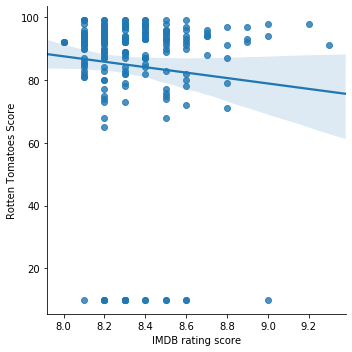

In [8]:
##showing correlation plot between IMDB rating score and rotten tomatoes score,to figure out whether two scoring systems are independent
##with each other
sns.lmplot(x='IMDB rating score', y='Rotten Tomatoes Score', data=imdb_omdb_merged, fit_reg=True)

In [9]:
##calculating correlation coefficient
corr_imdb_rotten = imdb_omdb_merged['IMDB rating score'].corr(imdb_omdb_merged['Rotten Tomatoes Score'])
print('The coefficient correlation between IMDB rating score and Rotten Tomatoes Score is',corr_imdb_rotten)

The coefficient correlation between IMDB rating score and Rotten Tomatoes Score is -0.0887694754079173


It seems like correlation between IMDB rating score and Rotten Tomatoes Score are weak, proving these are two independent scoring system

In [10]:
##Here is basic statistics value for all features may affected for IMDB rating score.
all_numerical_features = ['IMDB rating score','number of rating','number of audience(thousands)','Metascore','Rotten Tomatoes Score','number of production company','Budget(thousands in unit)','profits in USA']
stats = imdb_omdb_merged[all_numerical_features].describe()
Range = stats.T['max']-stats.T['min']
stats = stats.append(pd.Series(Range,name='range'))
interquartile_range = stats.T['75%']-stats.T['25%']
stats = stats.append(pd.Series(interquartile_range,name='interquartile range'))
stats

,IMDB rating score,number of rating,number of audience(thousands),Metascore,Rotten Tomatoes Score,number of production company,Budget(thousands in unit),profits in USA
count,250.000000,2.500000e+02,250.000000,246.000000,246.000000,250.000000,250.000000,2.500000e+02
mean,8.304000,5.351480e+05,320.092000,82.634146,84.930894,48.776000,24885.968000,8.194149e+07
std,0.224557,4.588381e+05,307.349825,10.183835,22.030019,20.317505,24839.204258,1.214931e+08
min,8.000000,2.522900e+04,10.000000,55.000000,10.000000,8.000000,1000.000000,5.090000e+02
25%,8.100000,1.564195e+05,19.000000,77.000000,87.000000,31.000000,10000.000000,6.579622e+06
50%,8.250000,3.915860e+05,253.000000,84.000000,92.000000,49.000000,17500.000000,3.381290e+07
75%,8.400000,8.025395e+05,571.250000,90.000000,94.750000,63.000000,28000.000000,1.009911e+08
max,9.300000,2.311509e+06,985.000000,100.000000,99.000000,103.000000,97600.000000,8.583730e+08
range,1.300000,2.286280e+06,975.000000,45.000000,89.000000,95.000000,96600.000000,8.583725e+08
interquartile range,0.300000,6.461200e+05,552.250000,13.000000,7.750000,32.000000,18000.000000,9.441151e+07


From above chart, we can see that standard deviation and interquartile range for metascore
and rotten tomatoes score are all larger than imdb rating score(in percentage term), meaning that
fluctations in imdb rating are less volatile and more stable. The mean for three scoring systems are similar.
one interesting thing to note that is the budget and profits vary a lot across different movies since interquartile
range is very large. It seems like even high score rated movie does not necessarily bring equal profits for producers

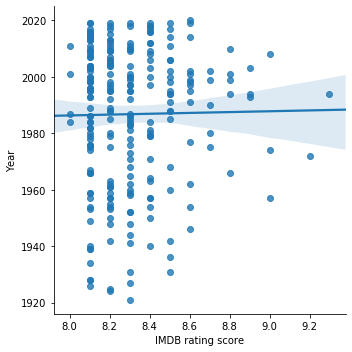

In [11]:
##correlation scatter plot for IMDB rating score with year the movie released.
sns.lmplot(x='IMDB rating score', y='Year', data=imdb_omdb_merged, fit_reg=True)

In [12]:
##calculating correlation coefficient
corr_imdb_year = imdb_omdb_merged['IMDB rating score'].corr(imdb_omdb_merged['Year'])
print('The coefficient correlation between IMDB rating score and year it released is',corr_imdb_year)

The coefficient correlation between IMDB rating score and year it released is 0.013450068704100246


The correlation coefficient is so weak it seems like there is almost no relationship between imdb score with year it release.

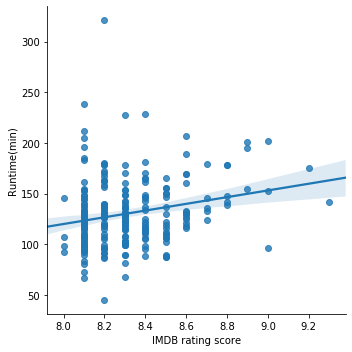

In [13]:
##correlation scatter plot for IMDB rating score with movies length.
sns.lmplot(x='IMDB rating score', y='Runtime(min)', data=imdb_omdb_merged, fit_reg=True)

In [14]:

corr_imdb_runtime = imdb_omdb_merged['IMDB rating score'].corr(imdb_omdb_merged['Runtime(min)'])
print('The coefficient correlation between IMDB rating score and runtime of movie is',corr_imdb_runtime)

The coefficient correlation between IMDB rating score and runtime of movie is 0.22692655620473062


The correlation coefficient is 0.226, it seems like relationship between imdb score with length of movir are weak and positive.

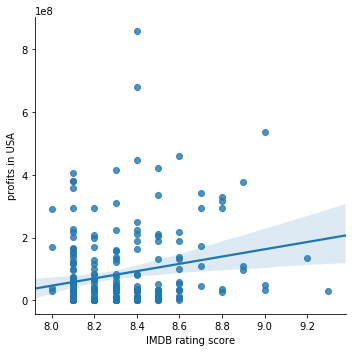

In [15]:
##correlation scatter plot for IMDB rating score with profits movie earns in usa.
sns.lmplot(x='IMDB rating score', y='profits in USA', data=imdb_omdb_merged, fit_reg=True)

In [16]:

corr_imdb_profit = imdb_omdb_merged['IMDB rating score'].corr(imdb_omdb_merged['profits in USA'])
print('The coefficient correlation between IMDB rating score and profit it earned is',corr_imdb_profit)

The coefficient correlation between IMDB rating score and profit it earned is 0.2141365615138167


the correlation coefficient equal to 0.214 indicates that the relationship between imdb rating score and profits earned is
weak but positive. In other words, high rated profits still can bring high profits for some movies, but not very obvious to
observe.

In [17]:
##Statistics charts for correlation between all numeric features (in imdb dataset) and imdb rating score, to make sure
##which features can affect imdb rating score
import statsmodels.api as sm # import statsmodels
all_numerical_features_X = ['number of rating','number of audience(thousands)','number of production company','Budget(thousands in unit)','profits in USA','gross worldwide profit']
x = imdb_omdb_merged[all_numerical_features_X]
y = imdb_omdb_merged['IMDB rating score']
x = sm.add_constant(x) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)

# Print out the statistics
model.summary()

C:\Users\Ruich\OneDrive\Pictures\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      IMDB rating score   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     30.93
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.65e-27
Time:                        11:12:40   Log-Likelihood:                 90.107
No. Observations:                 250   AIC:                            -166.2
Df Residuals:                     243   BIC:                            -141.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.3108      0.035    237.207      0.000       8.242       8.380
number of rating               3.396e-07   3.04e-08     11.187      0.000     2.8e-07    3.99e-07
number of audience(thousands)    -0.0001   3.75e-05     -2.937      0.004      -0.000   -3.63e-05
number of production company     -0.0022      0.001     -3.967      0.000      -0.003      -0.001
Budget(thousands in unit)     -6.196e-07   4.62e-07     -1.340      0.181   -1.53e-06    2.91e-07
profits in USA                -9.241e-10   3.05e-10     -3.026      0.003   -1.53e-09   -3.23e-10
gross worldwide profit         2.466e-10   1.08e-10      2.292      0.023    3.47e-11    4.59e-10
==============================================================================
Omnibus:                       15.353   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.804
Skew:                           0.552   Prob(JB):                     0.000224
Kurtosis:                       3.629   Cond. No.                     1.32e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From above chart, we can see the coefficients for all features are all negative so all features have adversial effects to imdb score(interesting to explore). For budget estimated, the p value is so large so we no longer consider it. By observing t value, t value in number of rating is largest so it has largest influences to imdb rating score among these six feature

In [18]:
##Double ensure what features may affect imdb rating score by using R^2 to judge it.
def r_square(x,y):
    correlation_matrix = np.corrcoef(x,y)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    return r_squared

print('R^2 for IMDB rating score and number of rating is', r_square(imdb_omdb_merged['number of rating'],imdb_omdb_merged['IMDB rating score']))
print('R^2 for IMDB rating score and number of audience(thousands) is', r_square(imdb_omdb_merged['number of audience(thousands)'],imdb_omdb_merged['IMDB rating score']))
print('R^2 for IMDB rating score and number of production company is', r_square(imdb_omdb_merged['number of production company'],imdb_omdb_merged['IMDB rating score']))
print('R^2 for IMDB rating score and Budget(thousands in unit) is', r_square(imdb_omdb_merged['Budget(thousands in unit)'],imdb_omdb_merged['IMDB rating score']))
print('R^2 for IMDB rating score and profits in USA is', r_square(imdb_omdb_merged['profits in USA'],imdb_omdb_merged['IMDB rating score']))
print('R^2 for IMDB rating score and gross worldwide profit is', r_square(imdb_omdb_merged['gross worldwide profit'],imdb_omdb_merged['IMDB rating score']))

R^2 for IMDB rating score and number of rating is 0.3475795126773388
R^2 for IMDB rating score and number of audience(thousands) is 0.10247378996261043
R^2 for IMDB rating score and number of production company is 0.002149978681452518
R^2 for IMDB rating score and Budget(thousands in unit) is 0.003846724683145731
R^2 for IMDB rating score and profits in USA is 0.045854466976960585
R^2 for IMDB rating score and gross worldwide profit is 0.045242411877035184


By observing r^2 for these features, r^2 in number of rating is largest, that correspond to its large t value. For remaining
features, their r^2 is all so small so its not very useful to use them to predict imdb rating score

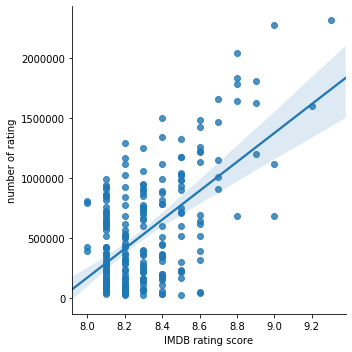

In [19]:
##correlation scatter plot for IMDB rating score with number of people who rate movie in usa.
sns.lmplot(x='IMDB rating score', y='number of rating', data=imdb_omdb_merged, fit_reg=True)

In [20]:
corr_imdb_numrating = imdb_omdb_merged['IMDB rating score'].corr(imdb_omdb_merged['number of rating'])
print('The coefficient correlation between IMDB rating score and number who rate this movie is',corr_imdb_numrating)

The coefficient correlation between IMDB rating score and number who rate this movie is 0.5895587440428128


Indeed, the correlation between imdb score with number of rating is strong and positive, meaning for high scored rated movie, there is more people willing to rate score. 

In [21]:
##load oscar_dataset and merge it with two other 
oscar_info.rename(columns = {'Film':'Title'}, inplace = True) 
imdb_oscar_merged_data = pd.merge(imdb_info,oscar_info,on='Title',how='outer')
# There are some movies present in oscars but not in imdb_data so remove them,as they have ranking with nan value
imdb_oscar_merged_data =imdb_oscar_merged_data[imdb_oscar_merged_data["Title"].notna()]
# For year,awards,and nomination columns where data is nan(present in imdb not in oscars table) fill it 0 as speciifed in the question
imdb_oscar_merged_data = imdb_oscar_merged_data.fillna(0)
imdb_oscar_merged_data = imdb_oscar_merged_data[:250]
imdb_oscar_merged_data = imdb_oscar_merged_data.drop(columns=['Year'])
#merged_data[['highest rating score','number of rating','number of audience(thousands)','gross worldwide profit','number of production company','Budget(thousands in unit)','profits in USA']].astype(int)

##In nominations and awards, by oscar award rules(which I search it on Google), there have some columns, for instance, in second row, 'The Godfather' nomination is 10[4],which
##means nomination equal to the larger number, since 10>4, so 10[4]=10 in this case.
imdb_oscar_merged_data.loc[imdb_oscar_merged_data.Title == "The Godfather", "Nominations"] = 10
##Same to apply when title = Raiders of the Lost Ark, awards with 1(4) equal to 4
imdb_oscar_merged_data.loc[imdb_oscar_merged_data.Title == "Raiders of the Lost Ark", "Awards"] = 4
##Same to apply when title = Toy Story, awards with 0(1) equal to 1
imdb_oscar_merged_data.loc[imdb_oscar_merged_data.Title == "Toy Story", "Awards"] = 1



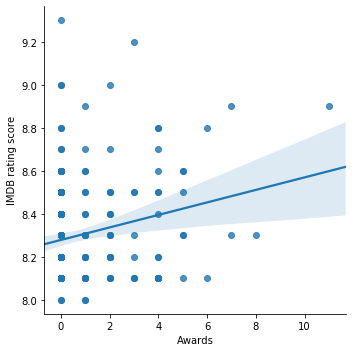

In [22]:
##correlation scatter plot for IMDB rating score with oscar awards the movie gain
imdb_oscar_merged_data["Awards"] = imdb_oscar_merged_data["Awards"].astype(int)
sns.lmplot(x='Awards', y='IMDB rating score', data=imdb_oscar_merged_data, fit_reg=True)

In [23]:
award_imdb_corr = imdb_oscar_merged_data['Awards'].corr(imdb_oscar_merged_data['IMDB rating score'])
print('The coefficient correlation between IMDB rating score and number of oscar awards movie gain is',award_imdb_corr)

The coefficient correlation between IMDB rating score and number of oscar awards movie gain is 0.22108974130574177


There is weak but positive correlation between IMDB rating score and number of oscar awards movie gain. High rated movies are more likely to gain oscar awards, but pattern is not obvious.

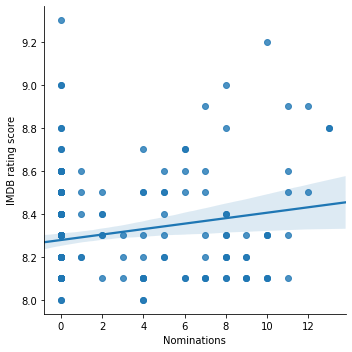

In [24]:
##correlation scatter plot for IMDB rating score with oscar nominations movie gain
imdb_oscar_merged_data["Nominations"] = imdb_oscar_merged_data["Nominations"].astype(int)
sns.lmplot(x='Nominations', y='IMDB rating score', data=imdb_oscar_merged_data, fit_reg=True)

In [25]:
nomination_imdb_corr = imdb_oscar_merged_data['Nominations'].corr(imdb_oscar_merged_data['IMDB rating score'])
print('The coefficient correlation between IMDB rating score and number of oscar nominations movie gain is',nomination_imdb_corr)

The coefficient correlation between IMDB rating score and number of oscar nominations movie gain is 0.1992196249394076


There is weak but positive correlation between IMDB rating score and number of oscar nominations movie gain. High rated movies are more likely to gain oscar awards, but pattern is not obvious.

In [26]:
##Finally, merge all three dataset together
imdb_omdb_oscar_merged_data = pd.merge(imdb_oscar_merged_data,omdb_info,on='Title',how='outer')
imdb_omdb_oscar_merged_data.columns

Index(['Title', 'url link', 'IMDB rating score', 'highest rating score',
       'number of rating', 'number of audience(thousands)', 'movie type',
       'movie length', 'movie genre', 'movie released date', 'stars',
       'gross worldwide profit', 'number of production company',
       'Budget(thousands in unit)', 'profits in USA', 'movie description',
       'Awards', 'Nominations', 'Metascore', 'Rotten Tomatoes Score', 'Year',
       'Country', 'Runtime(min)', 'Language', 'Director', 'Writer',
       'Production Company', 'Type', 'Plot'],
      dtype='object')

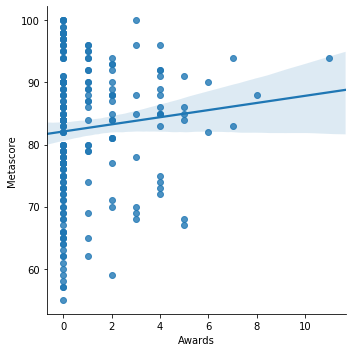

In [27]:
##correlation scatter plot for metascore with number of oscar awards movie gain.
sns.lmplot(x='Awards', y='Metascore', data=imdb_omdb_oscar_merged_data, fit_reg=True)

In [28]:
award_metascore_corr = imdb_omdb_oscar_merged_data['Awards'].corr(imdb_omdb_oscar_merged_data['Metascore'])
print('The coefficient correlation between Metascore and number of oscar award movie gain is',award_metascore_corr)

The coefficient correlation between Metascore and number of oscar award movie gain is 0.09644491258154109


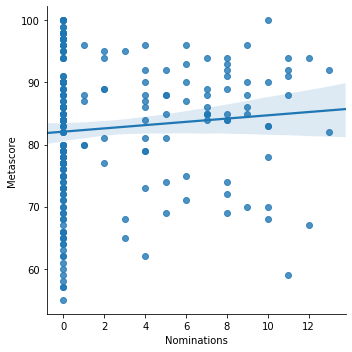

In [29]:
##correlation scatter plot for metascore with number of oscar nomination movie gain
sns.lmplot(x='Nominations', y='Metascore', data=imdb_omdb_oscar_merged_data, fit_reg=True)

In [30]:
nomination_metascore_corr = imdb_omdb_oscar_merged_data['Nominations'].corr(imdb_omdb_oscar_merged_data['Metascore'])
print('The coefficient correlation between Metascore and number of oscar nominations movie gain is',nomination_metascore_corr)

The coefficient correlation between Metascore and number of oscar nominations movie gain is 0.09144647798059032


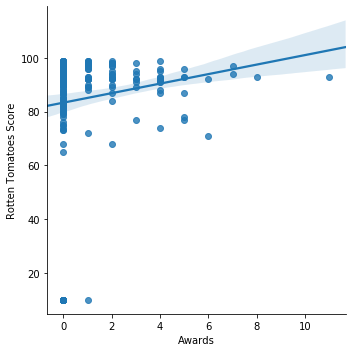

In [31]:
##correlation scatter plot for rotten tomatoes score with number of oscar awards movie gain
sns.lmplot(x='Awards', y='Rotten Tomatoes Score', data=imdb_omdb_oscar_merged_data, fit_reg=True)

In [32]:
award_tomato_corr = imdb_omdb_oscar_merged_data['Awards'].corr(imdb_omdb_oscar_merged_data['Rotten Tomatoes Score'])
print('The coefficient correlation between rotten tomato score and number of oscar award movie gain is',award_tomato_corr)

The coefficient correlation between rotten tomato score and number of oscar award movie gain is 0.1373785810898931


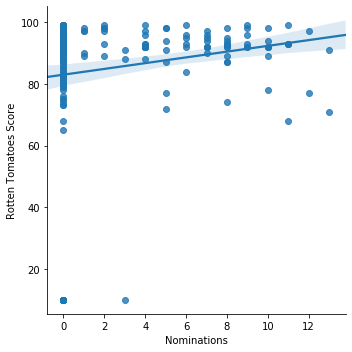

In [33]:
##correlation scatter plot for rotten tomatoes score with number of oscar nominations movie gain
sns.lmplot(x='Nominations', y='Rotten Tomatoes Score', data=imdb_omdb_oscar_merged_data, fit_reg=True)

In [34]:
nomination_tomato_corr = imdb_omdb_oscar_merged_data['Nominations'].corr(imdb_omdb_oscar_merged_data['Rotten Tomatoes Score'])
print('The coefficient correlation between rotten tomato score and number of oscar nominations movie gain is',nomination_tomato_corr)

The coefficient correlation between rotten tomato score and number of oscar nominations movie gain is 0.14973357414500169


However, for other two scoring system:metascore and rotten tomatoes score, the correlation between scores and oscar award/nominations are weaker compared with imdb rating.

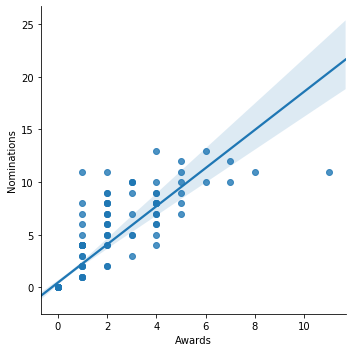

In [35]:
####correlation scatter plot for oscar nominations with number of oscar awards movie gain
sns.lmplot(x='Awards', y='Nominations', data=imdb_omdb_oscar_merged_data, fit_reg=True)

In [36]:
award_nomination_corr = imdb_omdb_oscar_merged_data['Awards'].corr(imdb_omdb_oscar_merged_data['Nominations'])
print('The coefficient correlation between number of nominations and number of oscar award movie gain is',award_nomination_corr)

The coefficient correlation between number of nominations and number of oscar award movie gain is 0.8783274328522259


Interestingly, there is very strong positive correlation between oscar awards and nominations. It seems like for movies gaining
oscar awards, it is very likely that it also gain nominations. Moreover, more oscar awards it win, more nominations it likely to win.

Text(0.5, 0, 'Awards')

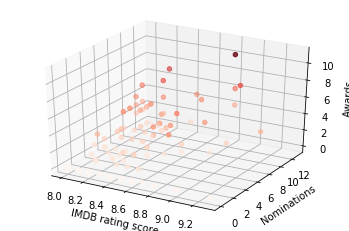

In [37]:
##3d data visualization to show relationship between imdb score, nomination and award
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
xdata = imdb_omdb_oscar_merged_data['IMDB rating score']
ydata = imdb_omdb_oscar_merged_data['Nominations']
zdata = imdb_omdb_oscar_merged_data['Awards']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds')
ax.set_xlabel('IMDB rating score')
ax.set_ylabel('Nominations')
ax.set_zlabel('Awards')

From this 3D plot, we can see that for movie with higher imdb rating score, although correlation is not very strong, it is more likely to gain awards and nomination, especially for movie rated 8.6 or higher. For movies score lower than 8.6, nominations are easier to gain than awards since there are so many points lies in horizontial plane.(no awards gain)

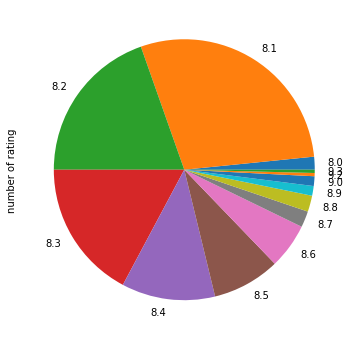

In [38]:
##counts of overall imdb score rating in pie chart form
imdb_rating_piechart = imdb_omdb_oscar_merged_data.groupby(imdb_omdb_oscar_merged_data['IMDB rating score'])['number of rating'].count().plot(kind='pie',figsize=(6,6))

From this pie chart, we say most movies' imdb rates lie between 8.1-8.3. Only very small portion of movies score 9.0 or higher

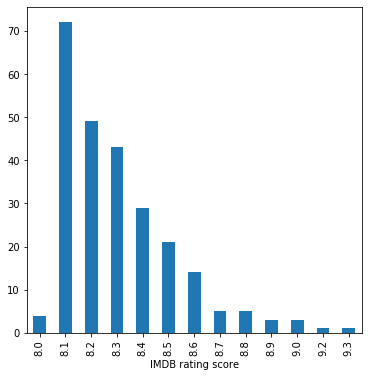

In [39]:
##count of overall imdb score rating in bar chart form
imdb_rating_barchart = imdb_omdb_oscar_merged_data.groupby(imdb_omdb_oscar_merged_data['IMDB rating score'])['number of rating'].count().plot(kind='bar',figsize=(6,6))

From bar plot, there is rough approximately 70+50+45=165 movies get scores between 8.1-8.3. Roughly, less than 10 movies gain 9.0 scores or higher.

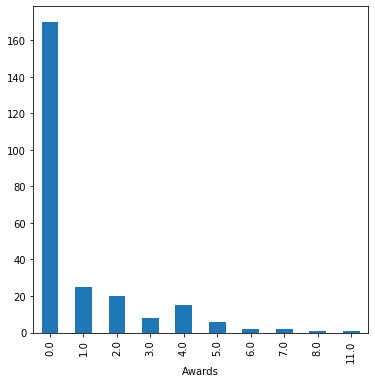

In [40]:
##count of overall number of oscar awards in pie chart form
award_barchart = imdb_omdb_oscar_merged_data.groupby(imdb_omdb_oscar_merged_data['Awards'])['IMDB rating score'].count().plot(kind='bar',figsize=(6,6))

From this bar plot, we know that high scores movies does not necessarily gain oscar awards.(Since my dataset are constituted of top 250 movies, so I think they are all high scored movie) Exceed 160 movies doesn't gain oscar awards. So it seems oscar judging criteria are very stirct. The distribution for movies gaining 1-11 awards are right skewed. It seems like gaining 1 or 2 oscar awards are relative easy than gaining multiple awards

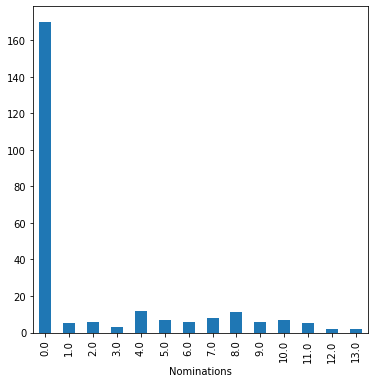

In [41]:
##count of overall nominations in pie chart form
nomination_barchart = imdb_omdb_oscar_merged_data.groupby(imdb_omdb_oscar_merged_data['Nominations'])['IMDB rating score'].count().plot(kind='bar',figsize=(6,6))

From this bar plot, we know that high scores movies does not necessarily gain oscar nominatinss. Exceed 160 movies doesn't gain oscar nominations. So it seems oscar judging criteria are very stirct. The distribution for movies gaining 1-13 nominations are uniformly distributed. 

### Conclusion

It seems like most of features(movie length, budget, profits earned, oscar awards and nominations) have positive but weak correlationship with imdb rating score. It is a little bit unexpected. Originally I think more features will have strong positivecorrelation with imdb rating scores, like profits earned, oscar awards and nominations gained. The truth is that correlation indeed is positive, but less stronger than I originally thought. Thus, I can infer that for high rated movies, they are indeed likely to have longer movie length, earn more profits, gain more oscar awards and nominations, but it is not very obvious. By the way, The strongest correlation I found is that between number of people who rate this movie and imdb rating score. It seems like high rated movies will likely have more people to rate this, or vice versa. Moreover, it seems like imdb, metascore, rotten tomatoes scores are three independent scoreing systems since their mutual correlation approach to zero.  